<center>
    <img src="./images/msp_header.png">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Artificial Neural Networks

The so-called **"Convolutional Neural Networks"** are like cascaded filter banks, but with a nonlinear function at the output of each filter and a constant offset, see for instance:

In [55]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/4l3uTwFJpdo?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [1]:
%%html
<iframe src="http://deeplearning.net/tutorial/lenet.html" width="900" height="600">
</iframe>

Its coefficients are called "weights".

The so-called “(Artificial) Neural Networks” simply use a weighted sum instead of the convolution, see:

In [2]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Artificial_neural_network" width="900" height="600">
</iframe>

and "An Introduction to Neural Computing", I. Aleksander, H. Morton, Chapman and Hall, 1990.

A nice application example for image understanding can be seen in:

In [3]:
%%html
<iframe src="http://cs.stanford.edu/people/karpathy/deepimagesent/" width="900" height="600">
</iframe>

Both types use several "layers" of cascading. If there are more than 3 layers, they are called **"Deep Neural Networks"**, with **"Deep Learning"**. These are current active research areas, for instance for speech recognition and image recognition. A  popular example is the MNIST handwritten digit recognition, described for instance here:

In [4]:
%%html
<iframe src="https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/" width="900" height="600">
</iframe>

This example, as most Neural Network implementation, uses Python and its Library "Keras". Another is "Pytorch".

The non-linear function $f(x)$ , also called "activation function" is often the so-called **sigmoid function**, see also:

In [5]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Sigmoid_function" width="900" height="600">
</iframe>

which is defined as:

$$\large
f(x) := \dfrac{1}{1+e^{-x}}$$

We can plot it with python:

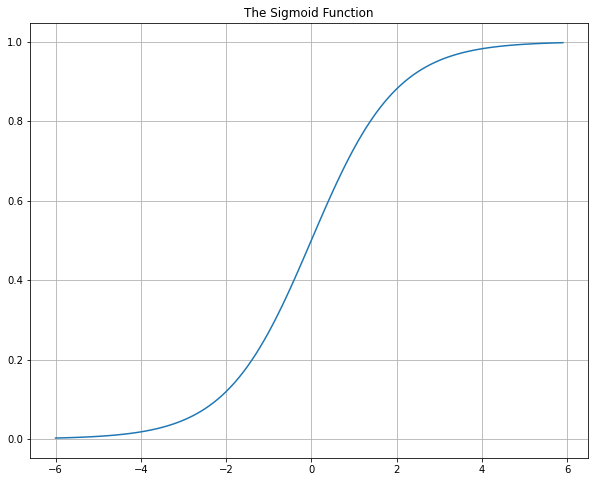

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-6,6,0.1)
y=1/(1+np.exp(-x))
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.title("The Sigmoid Function")
plt.grid()

We see that it behaves like a "soft-limiter" function.

Its derivative is:

$$\large
f'(x)=\dfrac{d}{dx}f(x)=\dfrac{e^x}{\left(1+e^x \right)^2}$$

Often used alternative activation functions are "tanh", "relu" (Rectified Linear Unit, which returns `x if x > 0,  alpha*x if x < 0` and more:

In [7]:
%%html
<iframe src="https://keras.io/activations/" width="900" height="600">
</iframe>

The following diagram shows a 3-layer artificial neural network,


<center>
    <br>
    <img src="./images/Lecture16_01_convNet.png" width="700"/>
</center>

Where

$$\large
f(x) := \dfrac{1}{1+e^{-x}}$$

The values with index 0 are often assumed to be "biases", fixed values. In general we have several outputs in our neural network, **output k** is the non-linear function of a sum $S_{o,k}$, $O_k=f(S_{o,k})$.

The sum is the weighted sum from the hidden layer outputs $h_j$. We choose $x_0=h_0=1$, such that we also obtain a constant offset as part of the sum:

$$\large
S_{o,k} = \sum_j w_{o,j,k} h_j $$

The output of the hidden layer $h_j$ is again a nonlinear function *f* of a sum $h_j=f \left(s_{h,j}\right)$.

The hidden layer sum is a weighted sum of input values $x_i$:

$$\large
S_{h,j} = \sum_i w_{h,i,j} x_i $$

The output of our neural network depends on the weights *w* and the inputs *x* (we assume a fixed sigmoid function). We assemble the inputs in the vector x which contains all the inputs, $x=[x_0, x_1,\dots]$ and vector *w* which contains all the weights (from the hidden and the output layer), $w=[w_{h,0,0}, w_{h,0,1}, \dots , w_{O,0,0}, W_{O,0,1}, \dots ]$

To express this dependency, we can rewrite the **output k** as $O_k(\mathbf{x,w})$.

Now we would like to "train" the network, meaning we would like to determine the weights such that if we present the neural network with a training pattern in **x**, the output produces a desired value. For instance, if we present an image with an object in it, the output indicates that the object was there with a desired output value. Hence we have **training inputs**, and **desired outputs $d_k$** (also called the **"target"**). We now use **optimization** to update the weights *w* to obtain outputs $o_k$ as close as possible to the desired outputs $d_k$ with a given input *x*.

In [56]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/_GKIBe9kHQM?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We use **Gradient Descent** for this optimization.

We start with an error function delta:

$$\large
\delta_k(x,w)=O_k(x,w)-d_k$$

An always positive Error function is its square:

$$\large
Err_k(x,w)=\dfrac{1}{2}\cdot(\delta_k(x,w))^2 $$

This is also called **"Loss Function"**, and this particular choice, the mean_squared_error.

To this error or function we can now apply **Gradient Descent**, also called **Stochastic Gradient Descend ('sgd')** in our case of Neural Network training:

$$\large
x_{new} = x_{old} - \alpha \cdot \nabla f(x_{old})$$

in our case this becomes:

$$\large
\begin{equation}\tag{2}
w_{new}=w_{old}- \alpha \cdot \nabla Err_k(x,w_{old})
\end{equation}$$

For the gradient $\nabla$ we need to compute the derivative to each weight $w_i$ of the weight vector **w**. In our case we apply the chain rule (outer derivative times inner derivative),

$$\large \tag{3}
\dfrac{d}{dw_i}Err_k(x,w)=\dfrac{d}{dw_i}\dfrac{1}{2}\cdot\delta_k^2(x,w) = \\
\large
= \delta_k(x,w) \cdot \underbrace{\dfrac{d}{dw_i}\delta_k(x,w)}_\textrm{inner derivative} = \\
\large
\begin{equation}
= \delta_k(x,w)\cdot \underbrace{\dfrac{d}{dw_i} O_k(x,w)}_\textrm{inner derivative}
\end{equation}$$

We compute this inner derivative first for the **output weights**, again with the chain rule:
$$\large
\dfrac{d}{dw_{o,j,k}} O_k(x,w) = \\
\large
\dfrac{d}{dw_{o,j,k}} f(S_{o,k}) = f'(S_{o,k}) \cdot \dfrac{d}{dw_{o,j,k}}S_{o,k} \\
\large
= f'(S_{o,k})\dfrac{d}{dw_{o,j,k}}\sum_{j'}w_{o,j',k}h_j
$$

finally we get:
$$\large
\begin{equation} \tag{4}
\dfrac{d}{dw_{o,j,k}} O_k(\mathbf{x,w})=f'(S_{o,k}) \cdot h_j
\end{equation}
$$

We now plug this result (4) into eq. (3) and eq. (2), and obtain the update rule for the Gradient Descent for the output weights:

$$\large
w_{o,j,new} = w_{o,j,old}-\alpha \cdot \delta_k(\mathbf{x,w})f'(S_{o,k}) \cdot h_j
$$

which says: **update = alpha** times **output delta** times **output derivative** times its **input** $h_j$ from the hidden nodes. 
Observe the only **local processing** for the update, which makes it suitable for massively **parallel processing**, e.g. in a Graphics Processing Unit!

For the hidden weights the inner derivative of eq. (3) becomes a little more complicated:

$$\large
\dfrac{d}{dw_{h,i,j}} O_k(\mathbf{x,w}) = \\
\large
\dfrac{d}{dw_{h,i,j}}f(S_{o,k}=f'(S_{o,k})\cdot \dfrac{d}{dw_{h,i,j}}S_{o,k} \\
\large
= f'(S_{o,k}) \dfrac{d}{dw_{h,i,j}} \sum_j w_{o,j,k}h_j \\
\\
\large
= f'(S_{o,k}) \cdot w_{o,j,k} \dfrac{d}{dw_{h,i,j}} h_j \\
\large
f'(S_{o,k}) \cdot w_{o,j,k} \dfrac{d}{dw_{h,i,j}} f(S_{h,j})
$$

apply the chain rule:

$$\large
= f'(S_{o,k}) \cdot w_{o,j,k} \cdot f'(S_{h,j}) \dfrac{d}{dw_{h,i,j}} S_{h,j}) \\
\large
= f'(S_{o,k}) \cdot w_{o,j,k} \cdot f'(S_{h,j}) \dfrac{d}{dw_{h,i,j}} \sum_i w_{h,i,j}x_i
$$

finally we get:

$$\large
\begin{equation} \tag{5}
\dfrac{d}{dw_{h,i,j}} O_k(\mathbf{x,w}) = f'(S_{o,k}) \cdot w_{o,j,k} \cdot f'(S_{h,j}) \cdot c_i
\end{equation}
$$

We now plug this result for the hidden weights (5) again into eq. (3) and eq. (2), and obtain the **update rule** for the Gradient Descent for the **hidden weights**:

$$\large
\begin{equation} \tag{6}
w_{h,i,j,new} = w_{h,i,j,old}-\alpha \cdot \delta_{h,k} (\mathbf{x,w}) \cdot f'(S_{h,j}) \cdot x_i
\end{equation}
$$

which says: **update** = **alpha** times **back propagated delta** times **derivative of hidden function** times its input $x_i$.


This algorithm is also called **Back-Propagation**. We need to do this update for each output node *k*.

This is in principle the same rule as for the output nodes, **just with its corresponding input and output.**

**This means: Back-Propagation** is just a consequence of applying the **Gradient Descent** algorithm to Neural Networks. A popular alternative to or refinement of Gradient Descent in Neural Networks is the algorithm **"Adam"**, see also:

In [8]:
%%html
<iframe src="https://keras.io/optimizers/" width="900" height="600"></iframe>

Hence for all nodes we obtain a **"local" processing**. We just look at one node, call its input $x_i$ , its output *o* , its weights $w_i$, and its desired output *d*. Then we obtain its output with: 

$$\large 
s=\sum_i w_i x_i$$

$$o=f(s)$$

If it is an **output node** the difference delta to the desired *d* is:

$$\large
\delta = o -d $$

if it is a **hidden node** we use the **"back propagated"** $\mathbf{\delta}$ from an output difference $\delta_o$, weight to the output node $w_o$ , and sum for the output node $s_o$ :

$$\large
\delta = \delta_0 \cdot f'(S_o) \cdot w_o $$

Then we get the **local weight update** as:

$$\large
w_{i,new} = w_{i,old} - \alpha \cdot \delta \cdot f'(s) \cdot x_i $$

This is depicted in the following diagram:

<center>
    <br>
    <img src="./images/Lecture16_02_neuron.png" width="700"/>
</center>

Weight update during training with output difference $\delta$:

$$\large
w_{i,new} = w_{i,old} - \alpha \cdot f'(S) \cdot x_i $$

## Python Example for the MNIST Digit Recognition:

In [57]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/6SJG9usU8ls?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [9]:
#from: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
# mnistexample.py

import warnings
warnings.filterwarnings('ignore')

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


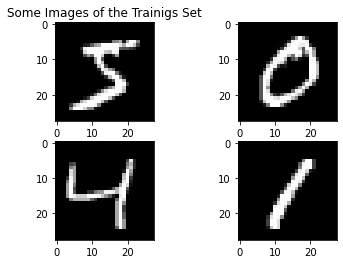

In [10]:
# Plot ad hoc mnist instances
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.title("Some Images of the Trainigs Set")
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

X_testunflat=X_test.copy() #keep original for imshow later
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 6s - loss: 0.2782 - accuracy: 0.9211 - val_loss: 0.1414 - val_accuracy: 0.9578
Epoch 2/2
 - 5s - loss: 0.1116 - accuracy: 0.9675 - val_loss: 0.0924 - val_accuracy: 0.9705
Baseline Error: 2.95%


sample.shape= (784,)
prediction= [2]


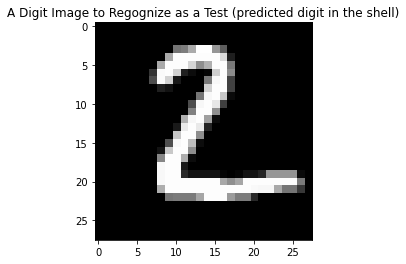

In [14]:
plt.imshow(X_testunflat[1], cmap=plt.get_cmap('gray'))
plt.title("A Digit Image to Regognize as a Test (predicted digit in the shell)")

sample=X_test[1,:]
print("sample.shape=", sample.shape)
prediction=model.predict_classes(numpy.expand_dims(sample,0))
print("prediction=", prediction)

plt.show()

# Convolution Neural Networks

In Convolutional Neural Networks, each layer basically consist of **filter banks**, were fixed **bias** terms are added to each output, and the result is passed through a non-linearity. The filters are called **"Receptive Fields"**, in analogy to the processing e.g. in the retina of the eye. 

The filter coefficients and bias terms are then optimized according to a target function and a loss function, which computes the "distance" to the target function.

In [58]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/rWWeAD56uM8?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

## Python Keras Convolutional Neural Network Example

Most of Neural Network development is done in Python. It has powerful libraries for it, for instance "Keras" and "Theano" or "Tensorflow". Python Keras and Theano are libraries to compute and train neural networks. See also:

In [15]:
%%html
<iframe src="https://keras.io/getting-started/faq/" width="900" height="600"></iframe>

In our example, we want to detect a signal in a sequence, here a “ramp” function np.arange(5), using a convolutional neural network.

In a Keras example, we first define input (data) and desired output (target).

For the input, we prepend and append a few zeros to the ramp function, such that the neural network has to find the position of the ramp:

`X = np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),
np.zeros((1,9))))`

We need to expand dimensions because Keras expects *X* with shape (batch, length, channels), with:

"batch": training examples (here only 1 batch)<br>
"length": length of our signals (here 23)<br>
"channels": Channels of our data, for instance for stereo, here 1 channel.

The target signal has the same sizes on this case, because the “causal” network returns the same number of samples at the output as the input. We set it up as containing all zeros, except for a 1 at the time of detecting the pattern:

`Y = np.zeros((1,23))
Y[0,16]=1 #Detecting the signal at its end`

Expanding dimensions:

`Y=Y.transpose()
Y=np.expand_dims(Y, axis=0)`

Then we set up a neural network model starting with:

`model = Sequential()`

A convolutional layer is added with:

`model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='causal', activation="linear", use_bias=False, kernel_initializer='glorot_uniform', input_shape=(23,1)) )`

A filter here is used to detect a pattern, similar to a matched filter in our lecture "Advanced Digital Signal Processing", Slides 13 (see our Website). The "kernel_size" is the size of our filters impulse response, here it can detect patterns of  length 8 samples.

"strides=1" means there is no downsampling,<br>
"padding='causal'" means there is zero-padding of kernel_size-1 zeros before the beginning of our signal, <br>
"activation='linear'" means there is no nonlinearity after the summation, <br>
"use_bias=False" means the bias is zero, <br>
"kernel_initializer" is the (random) initialization of the weights at the beginning of training, <br>
"input_shape" is the size of the signal at the layers input.

Then we need to "compile" the model and specify the used error function and optimizer:

`model.compile(loss='mean_absolute_error',optimizer='adam')`

"loss" is the error function, here the mean absolute error between network output and the target,<br>
"optimizer" is the optimization function to use to obtain the "best" weights, here "adam", which seems to be the best.

Then we can train the model with: <br>
`model.fit(X, Y, epochs=5000, batch_size=1)`


where "X" is the data or signal, <br>
"Y" is the traget, <br>
"epochs" is the number of iterations the optimizers uses, <br>
"batch_size" is the number of examples we have, here just 1.

After the optimization finished, we can use our model for prediction, here detecting the signal (usually a separate test signal is used, which differs from the training signal, but here we take the same for simplicity):<br>
`predictions=model.predict(X)`

we can read out the resulting weights with `ww = model.get_weights()`

The first index refers to the layer, here we only have 1, hence the index is 0, then the next index refers to the input dimension, the next to the output dimension (we have only one output neuron, hence the index is 0), and finally the channels index, again 0.

Hence our filter weights are:
`weights=ww[0][:,0,0]`

We can also save the weights in a “pickle” file: 

`
with open("convnetweights.pickle", 'wb') as weightfile:
pickle.dump(ww, weightfile)
`

Using pickle has the advantage that we can more easily analyse and modify the weights if we wish, compared to `model.save_weights('weights.hdf5').`

We can now plot the output of the neural network, the weights, and the input. The output and the weights have the same fomat as the input, (batch, length, channels), in our case the first and last index is 0:
```python
plt.plot(predictions[0,:,0])
plt.title('The Conv. Neural Network Output')
plt.figure()
plt.plot(weights)
plt.title('The Weights')
plt.figure()
plt.plot(X[0,:,0])
plt.title('The Input Signal')
plt.show()
```

\# -*- coding: utf-8 -*-
\__author__ = 'Gerald Schuller'
\__copyright__ = 'G.S.'

"""
Simple program to use a convolutional neural network to obtain a matched filter, or an analysis filter bank, with filtering followed by downsampling.
Gerald Schuller, July 2017.
"""

In [16]:
# keras_simpl_convnet.py
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv1D
from keras.constraints import unit_norm
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [17]:
def generate_dummy_data():
    #Method to generate some artificial data in an numpy array form in order to fit the network.
    #:return: X, Y numpy arrays used for training, X: Input, Y: Target
    
    #Input signal X, a Ramp function:
    X= np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),np.zeros((1,9)))) #ramp as simple signal to detect
    #Make it unit L2 norm:
    X= X/np.sqrt(np.dot(X,X.transpose()))
    #Make input a shape that keras expects,
    #input X with shape (batch, length, channels), channels: e.g. RGB
    #https://stackoverflow.com/questions/43235531/convolutional-neural-network-conv1d-input-shape
    X=X.transpose()  #signal in the middle dimension
    X = np.expand_dims(X, axis=0)  #add batch dimension (here only 1 batch)
    
    #Target function Y, the desired output:
    Y = np.zeros((1,23))
    Y[0,16]=1 #Detecting the signal at its end (for convolution padding='causal').
    #Make target a shape keras expects, same as input X shape:
    Y=Y.transpose()
    Y=np.expand_dims(Y, axis=0)
    return X, Y

In [18]:
def generate_model():
    #    Method to construct a convolutional neural network using keras and theano.
    #    :return: Trainable object
    
    # Define the model. 
    model = Sequential()
    #Obtain a linear filter from a convolutional layer, similar to a matched filter:
    model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='causal', activation="linear", 
                     use_bias=False, kernel_initializer='glorot_uniform', input_shape=(23,1)) )
    #uniform initialization:
    #model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='causal, activation="linear", use_bias=False, kernel_initializer='uniform', input_shape=(23,1)) )
    
    # Compile appropriate theano functions
    #losses: https://keras.io/losses/
    #mean_squared_error ('mse'), mean_absolute_error(y_true, y_pred), mean_squared_logarithmic_error,...
    #model.compile(loss='mean_squared_error', optimizer='sgd')
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [19]:
#   Demonstration on using the code.
X, Y = generate_dummy_data() # Acquire Training Dataset
print("Input X[0,:,0]=", X[0,:,0], "X.shape=", X.shape )
print("Target Y[0,:,0]=", Y[0,:,0], "Y.shape=", Y.shape)

Input X[0,:,0]= [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.18257419 0.36514837
 0.54772256 0.73029674 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ] X.shape= (1, 23, 1)
Target Y[0,:,0]= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Y.shape= (1, 23, 1)


In [20]:
model = generate_model()     # Compile an neural net
print("Train model:")
model.fit(X, Y, epochs=5000, batch_size=1)  #use 5000 epochs or iterations for training
model.evaluate(X, Y,  batch_size=1, verbose=1)    
predictions=model.predict(X) # Make Predictions based on the obtained weights
ww = model.get_weights()   #read obtained weights
#weight format for Conv1d:
#[0: filter weights, 1: bias for first layer]
#[filterlength, channels (subbands) in previous layer, neurons/filters in this layer] 
weights=ww[0][:,0,0]

Train model:
Epoch 1/5000
1/1 [==============================] - 0s 289ms/step - loss: 0.1265
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1260
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1256
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1252
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1247
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1243
Epoch 7/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1239
Epoch 8/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1234
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1230
Epoch 10/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1225
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1221
Epoch 12/5000
1/1 [==============================] - 0s 996us/step - loss: 0.1216
Epoch 13/5000
1/1 [=======

Epoch 103/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0962
Epoch 104/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0960
Epoch 105/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0959
Epoch 106/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0957
Epoch 107/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0956
Epoch 108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0954
Epoch 109/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0953
Epoch 110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0951
Epoch 111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0950
Epoch 112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0948
Epoch 113/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0947
Epoch 114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0945
Epoch 115/5000
1/1 [==

Epoch 204/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 206/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0832
Epoch 207/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0831
Epoch 208/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0830
Epoch 209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0829
Epoch 210/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0828
Epoch 211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 212/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0826
Epoch 213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 214/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0824
Epoch 215/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0823
Epoch 216/5000
1

Epoch 305/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0746
Epoch 306/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0746
Epoch 307/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0745
Epoch 308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0743
Epoch 310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0743
Epoch 311/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0742
Epoch 312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 313/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0740
Epoch 314/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0740
Epoch 315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0739
Epoch 316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 317/5000
1/1

Epoch 406/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0673
Epoch 407/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0673
Epoch 408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 409/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 410/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0670
Epoch 411/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0670
Epoch 412/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0669
Epoch 413/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0668
Epoch 414/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0667
Epoch 415/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0667
Epoch 416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 418/50

Epoch 507/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 508/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0609
Epoch 509/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0609
Epoch 510/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 511/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0608
Epoch 512/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0607
Epoch 513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0606
Epoch 515/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0605
Epoch 516/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0605
Epoch 517/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0604
Epoch 518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 519/5000
1

Epoch 607/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 608/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0552
Epoch 609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 610/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0550
Epoch 611/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0550
Epoch 612/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0549
Epoch 613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 615/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0547
Epoch 616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 617/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0546
Epoch 618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 619/5000
1/1

Epoch 708/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0516
Epoch 709/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 710/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0515
Epoch 711/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0515
Epoch 712/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0515
Epoch 713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 717/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0514
Epoch 718/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0513
Epoch 719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 720/5000
1

Epoch 808/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0491
Epoch 809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 810/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0490
Epoch 811/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0490
Epoch 812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 815/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0489
Epoch 816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 817/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0488
Epoch 818/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0488
Epoch 819/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0488
Epoch 820/5000
1

Epoch 908/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0466
Epoch 909/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 910/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0466
Epoch 911/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 914/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0465
Epoch 915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 917/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0464
Epoch 918/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0464
Epoch 919/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0464
Epoch 920/5000
1

Epoch 1009/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 1010/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 1011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 1012/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 1013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 1014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 1015/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0441
Epoch 1016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 1017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 1018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 1019/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0440
Epoch 1020/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0439
Epoch 1021/5

Epoch 1108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 1109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 1110/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0426
Epoch 1111/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 1112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 1113/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0426
Epoch 1114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 1115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 1116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 1117/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0425
Epoch 1118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0425
Epoch 1119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 1120

Epoch 1208/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0415
Epoch 1209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0415
Epoch 1210/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0415
Epoch 1211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 1212/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0414
Epoch 1213/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0414
Epoch 1214/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0414
Epoch 1215/5000
1/1 [==============================] - 0s 988us/step - loss: 0.0414
Epoch 1216/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0414
Epoch 1217/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0414
Epoch 1218/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0414
Epoch 1219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0413


Epoch 1307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 1308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 1309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 1310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 1311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 1312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 1313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 1314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 1315/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0402
Epoch 1316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 1317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 1318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 1319/500

Epoch 1406/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0392
Epoch 1407/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0392
Epoch 1408/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0392
Epoch 1409/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0391
Epoch 1410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 1411/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0391
Epoch 1412/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0391
Epoch 1413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 1414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 1415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 1416/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0391
Epoch 1417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 

Epoch 1505/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 1506/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0380
Epoch 1507/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0380
Epoch 1508/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0380
Epoch 1509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 1510/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0380
Epoch 1511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 1512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 1513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 1514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 1515/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0379
Epoch 1516/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0379
Epoch 

Epoch 1604/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 1605/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 1606/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0369
Epoch 1607/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0369
Epoch 1608/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0369
Epoch 1609/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0369
Epoch 1610/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 1611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 1612/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0368
Epoch 1613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 1614/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0368
Epoch 1615/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0368
Ep

Epoch 1703/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0358
Epoch 1704/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 1705/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 1706/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0358
Epoch 1707/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 1708/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 1709/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 1710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 1711/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0357
Epoch 1712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 1713/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0357
Epoch 1714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 1715

Epoch 1802/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 1803/5000
1/1 [==============================] - 0s 981us/step - loss: 0.0347
Epoch 1804/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0347
Epoch 1805/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 1806/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 1807/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 1808/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0346
Epoch 1809/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0346
Epoch 1810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 1811/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 1812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 1813/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0346
Epoch 

Epoch 1901/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0336
Epoch 1902/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 1903/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0336
Epoch 1904/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0335
Epoch 1905/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 1906/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0335
Epoch 1907/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0335
Epoch 1908/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0335
Epoch 1909/5000
1/1 [==============================] - 0s 992us/step - loss: 0.0335
Epoch 1910/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0335
Epoch 1911/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0335
Epoch 1912/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0

Epoch 2000/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 2001/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0325
Epoch 2002/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0325
Epoch 2003/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0325
Epoch 2004/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 2005/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0324
Epoch 2006/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0324
Epoch 2007/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0324
Epoch 2008/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 2009/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 2010/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0324
Epoch 2011/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0324
Ep

Epoch 2099/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0314
Epoch 2100/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0314
Epoch 2101/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 2102/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0313
Epoch 2103/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 2104/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0313
Epoch 2105/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0313
Epoch 2106/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 2107/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 2108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 2109/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0313
Epoch 2110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313
Epoc

Epoch 2198/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0303
Epoch 2199/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 2200/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0303
Epoch 2201/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0303
Epoch 2202/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0302
Epoch 2203/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 2204/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 2205/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0302
Epoch 2206/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0302
Epoch 2207/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0302
Epoch 2208/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0302
Epoch 2209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302


Epoch 2297/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0292
Epoch 2298/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 2299/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0292
Epoch 2300/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 2301/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 2302/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 2303/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0291
Epoch 2304/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 2305/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0291
Epoch 2306/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0291
Epoch 2307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 2308/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0291
Epoc

Epoch 2396/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0281
Epoch 2397/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0281
Epoch 2398/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0281
Epoch 2399/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 2400/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 2401/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0280
Epoch 2402/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0280
Epoch 2403/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0280
Epoch 2404/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 2405/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 2406/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 2407/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0280
Epoc

Epoch 2495/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 2496/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 2497/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0270
Epoch 2498/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 2499/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0270
Epoch 2500/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 2501/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 2502/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0269
Epoch 2503/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 2504/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 2505/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0269
Epoch 2506/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0269
Epoch 2507

Epoch 2594/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 2595/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 2596/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 2597/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 2598/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 2599/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0259
Epoch 2600/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0259
Epoch 2601/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0259
Epoch 2602/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 2603/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0258
Epoch 2604/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0258
Epoch 2605/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 

Epoch 2693/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0249
Epoch 2694/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0248
Epoch 2695/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 2696/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0248
Epoch 2697/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0248
Epoch 2698/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 2699/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 2700/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0248
Epoch 2701/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 2702/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0248
Epoch 2703/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 2704/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0247
Ep

Epoch 2792/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0238
Epoch 2793/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0238
Epoch 2794/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 2795/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0238
Epoch 2796/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0237
Epoch 2797/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0237
Epoch 2798/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 2799/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0237
Epoch 2800/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0237
Epoch 2801/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 2802/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0237
Epoch 2803/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0237


Epoch 2891/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0227
Epoch 2892/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0227
Epoch 2893/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 2894/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0227
Epoch 2895/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 2896/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 2897/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0226
Epoch 2898/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 2899/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0226
Epoch 2900/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 2901/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 2902/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 

Epoch 2990/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0216
Epoch 2991/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0216
Epoch 2992/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0216
Epoch 2993/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0216
Epoch 2994/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0216
Epoch 2995/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0215
Epoch 2996/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0216
Epoch 2997/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215
Epoch 2998/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0215
Epoch 2999/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 3000/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 3001/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0215
Ep

Epoch 3089/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 3090/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0205
Epoch 3091/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0205
Epoch 3092/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 3093/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0205
Epoch 3094/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 3095/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0205
Epoch 3096/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0205
Epoch 3097/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0205
Epoch 3098/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 3099/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0204
Epoch 3100/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0204
Ep

Epoch 3188/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0195
Epoch 3189/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3190/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3191/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0194
Epoch 3192/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3193/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3194/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0194
Epoch 3195/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3196/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0194
Epoch 3197/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0194
Epoch 3198/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 3199/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0193
Epoch 

Epoch 3287/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0184
Epoch 3288/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 3289/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 3290/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 3291/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0183
Epoch 3292/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 3293/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 3294/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0183
Epoch 3295/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 3296/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0183
Epoch 3297/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 3298/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0182
Epoch 

Epoch 3386/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 3387/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 3388/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0173
Epoch 3389/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 3390/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0172
Epoch 3391/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 3392/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 3393/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 3394/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 3395/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 3396/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0172
Epoch 3397/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0172
Epoch 33

Epoch 3485/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 3486/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 3487/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 3488/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 3489/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 3490/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0161
Epoch 3491/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 3492/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 3493/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 3494/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 3495/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0161
Epoch 3496/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0161
Epoch 3497

Epoch 3584/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0151
Epoch 3585/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 3586/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 3587/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0151
Epoch 3588/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 3589/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 3590/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0151
Epoch 3591/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 3592/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0150
Epoch 3593/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0150
Epoch 3594/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 3595/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0150
Epoc

Epoch 3683/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 3684/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0140
Epoch 3685/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0140
Epoch 3686/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 3687/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 3688/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 3689/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0140
Epoch 3690/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 3691/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0139
Epoch 3692/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 3693/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 3694/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 36

Epoch 3782/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 3783/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0129
Epoch 3784/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 3785/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 3786/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0129
Epoch 3787/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0129
Epoch 3788/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 3789/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 3790/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 3791/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 3792/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0128
Epoch 3793/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0128
Epoch 

Epoch 3881/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 3882/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 3883/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0118
Epoch 3884/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 3885/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0118
Epoch 3886/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0118
Epoch 3887/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0118
Epoch 3888/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0118
Epoch 3889/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 3890/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0117
Epoch 3891/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 3892/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0117
Ep

Epoch 3980/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3981/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3982/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 3983/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3984/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0107
Epoch 3985/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0107
Epoch 3986/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 3987/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0107
Epoch 3988/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 3989/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0107
Epoch 3990/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 3991/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 39

Epoch 4079/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0097
Epoch 4080/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 4081/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0097
Epoch 4082/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0097
Epoch 4083/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 4084/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 4085/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 4086/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0096
Epoch 4087/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 4088/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 4089/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 4090/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0096
Epoch 

Epoch 4178/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 4179/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0086
Epoch 4180/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0086
Epoch 4181/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.0086
Epoch 4182/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 4183/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0086
Epoch 4184/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 4185/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0085
Epoch 4186/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0085
Epoch 4187/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 4188/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0085
Epoch 4189/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0085

Epoch 4277/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4278/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4279/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4280/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 4281/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4282/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4283/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4284/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4285/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4286/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4287/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 4288/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 

Epoch 4377/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4378/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4379/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0075
Epoch 4380/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4381/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4382/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4383/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4384/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4385/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4386/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4387/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4388/5000
1/1 [==============================] - 0s 997us/step - loss: 0.007

Epoch 4476/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4477/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4478/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0076
Epoch 4479/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4480/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4481/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4482/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 4483/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4484/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4485/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4486/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4487/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoc

Epoch 4575/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4576/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4577/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0076
Epoch 4578/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4579/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4580/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 4581/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 4582/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0075
Epoch 4583/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4584/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4585/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0075
Epoch 4586/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoc

Epoch 4674/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4675/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4676/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4677/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4678/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4679/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4680/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4681/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4682/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4683/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4684/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4685/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Ep

Epoch 4773/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4774/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4775/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 4776/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4777/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0075
Epoch 4778/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4779/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4780/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4781/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4782/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4783/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4784/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0075
Epoc

Epoch 4872/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4873/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4874/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4875/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4876/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4877/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4878/5000
1/1 [==============================] - 0s 0us/step - loss: 0.0075
Epoch 4879/5000
1/1 [==============================] - 0s 0us/step - loss: 0.0075
Epoch 4880/5000
1/1 [==============================] - 0s 0us/step - loss: 0.0075
Epoch 4881/5000
1/1 [==============================] - 0s 0us/step - loss: 0.0076
Epoch 4882/5000
1/1 [==============================] - 0s 0us/step - loss: 0.0075
Epoch 4883/5000
1/1 [==============================] - 0s 0us/step - loss: 0.0075
Epoc

Epoch 4971/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4972/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0075
Epoch 4973/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4974/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0075
Epoch 4975/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4976/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0075
Epoch 4977/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4978/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4979/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4980/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0075
Epoch 4981/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0075
Epoch 4982/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0

In [21]:
print("Predictions[0,:,0]= ", predictions[0,:,0])
print("weights= ", weights)

Predictions[0,:,0]=  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  1.9492714e-02  5.4606467e-02
 -9.7770855e-02 -1.8122792e-04 -6.9379807e-05 -1.0102987e-04
  9.9981499e-01 -7.7863740e-05 -3.2038013e-05  3.1428572e-06
 -3.9162107e-05  0.0000000e+00  0.0000000e+00]
weights=  [-5.3624924e-05  4.4522232e-05 -5.0449074e-05 -7.7637400e-05
  1.3691254e+00 -1.0269309e+00  8.5559949e-02  1.0676599e-01]


In [22]:
#model.save_weights('weights.hdf5') #save weights to file
with open("convnetweights.pickle", 'wb') as weightfile:
    pickle.dump(ww, weightfile)

After the 5000 iterations of the optimization, were we can observe the decline of the loss function, we get the following plots,

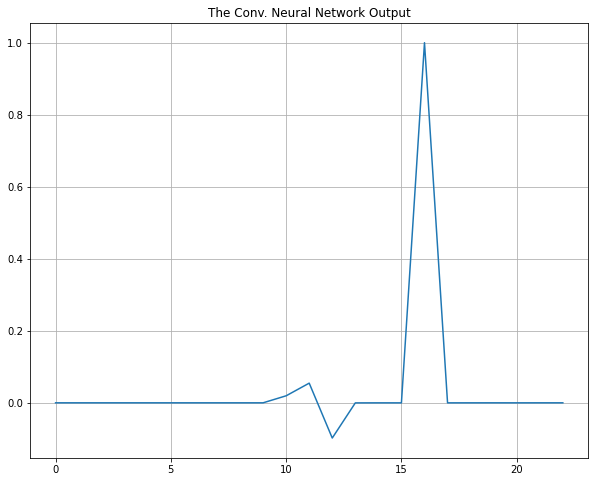

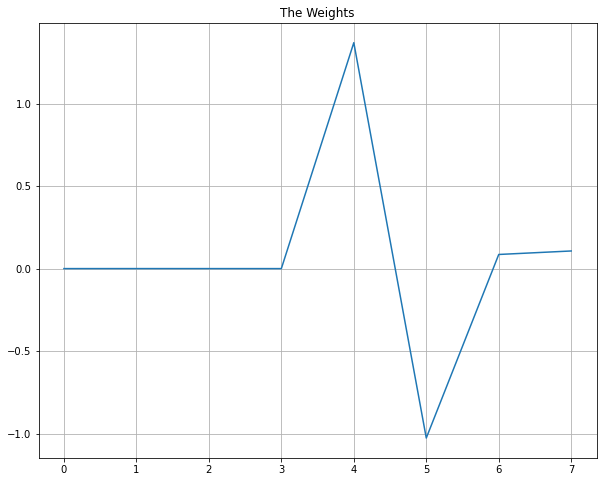

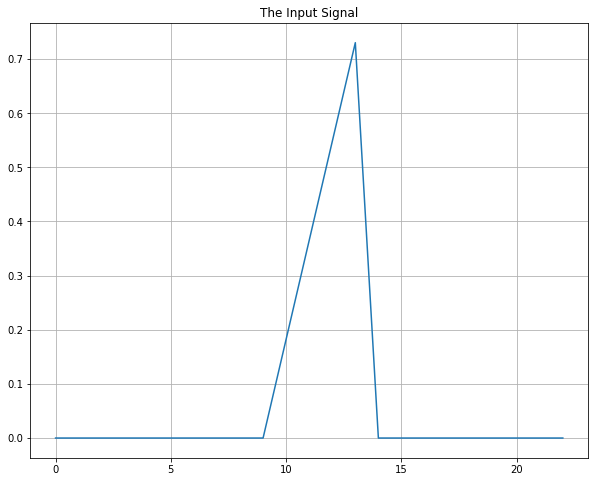

In [23]:
plt.figure(figsize=(10,8))
plt.plot(predictions[0,:,0])
plt.title('The Conv. Neural Network Output')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(weights)
plt.grid()
plt.title('The Weights')
plt.figure(figsize=(10,8))
plt.plot(X[0,:,0])
plt.title('The Input Signal')
plt.grid()

Look at the weights plot, and compare it to a matched filter, which is used to detect a signal with a maximum possible Signal-to-Noise ratio ( our lecture “Advanced Digital Signal Processing”, Slides 13). 

In [24]:
%%html
<iframe src="https://nbviewer.jupyter.org/github/GuitarsAI/ADSP_Tutorials/blob/master/ADSP_13_Matched_Filters.ipynb" width="900" height="600">
</iframe>

In the matched filter case, the weights should be the signal to detect, but time reversed (here a reversed ramp function). But our weights function looks quite different. 

This is because we specified a target function which only has a very narrow "peak", and this is what we also observe at the output of our convolutional neural network. This may not have a maximum SNR, but a more narrow peak at detection, which enables a more precise location of our pattern!

If we choose **"padding='valid'"** in our convolutional layer (as is the default), then no zero-padding of kernel_size-1 zeros before the signal starts is done, and hence the output of the convolutional layer will be accordingly shorter than the input. 

But we can obtain the same results if we remove accordingly kernel_size-1 (or filterlength-1) samples from the beginning of the target function with:

`gap=int(filterlength)-1
Y=Y[:,gap:,:]`

Just remember that the output is accordingly shorter, kernel-size-1 samples in the beginning are missing compared to padding="causal". We can let it run with:

In [54]:
filterlength=8

#   Demonstration on using the code.
X, Y = generate_dummy_data() # Acquire Training Dataset
print("Input X[0,:,0]=", X[0,:,0], "X.shape=", X.shape )
#gap = filterlength-1, in this way the delay becomes like with 'causal':
gap=int(filterlength)-1
Y=Y[:,gap:,:]
print("Target Y[0,:,0]=", Y[0,:,0], "Y.shape=", Y.shape)

Input X[0,:,0]= [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.18257419 0.36514837
 0.54772256 0.73029674 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ] X.shape= (1, 23, 1)
Target Y[0,:,0]= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Y.shape= (1, 16, 1)


In [26]:
def generate_model():
    #    Method to construct a convolutional neural network using keras and theano.
    #    :return: Trainable object
    
    # Define the model. 
    model = Sequential()
    #Obtain a linear filter from a convolutional layer, similar to a matched filter:
    model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='valid', activation="linear", use_bias=False, kernel_initializer='glorot_uniform', input_shape=(23,1)) )
    #uniform initialization:
    #model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='causal, activation="linear", use_bias=False, kernel_initializer='uniform', input_shape=(23,1)) )
    
    # Compile appropriate theano functions
    #losses: https://keras.io/losses/
    #mean_squared_error ('mse'), mean_absolute_error(y_true, y_pred), mean_squared_logarithmic_error,...
    #model.compile(loss='mean_squared_error', optimizer='sgd')
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [27]:
model = generate_model()     # Compile an neural net
print("Train model:")
model.fit(X, Y, epochs=5000, batch_size=1)  #use 7000 epochs or iterations for training
model.evaluate(X, Y,  batch_size=1, verbose=1)    
predictions=model.predict(X) # Make Predictions based on the obtained weights
ww = model.get_weights()   #read obtained weights
weights=ww[0][:,0,0]

Train model:
Epoch 1/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.1821
Epoch 2/5000
1/1 [==============================] - 0s 997us/step - loss: 0.1815
Epoch 3/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1800
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1789
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1784
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1773
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1767
Epoch 12/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1762
Epoch 13/5000
1/1 [===========

Epoch 103/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1355
Epoch 104/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1352
Epoch 105/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1348
Epoch 106/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1344
Epoch 107/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1341
Epoch 108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1337
Epoch 109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1333
Epoch 110/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1330
Epoch 111/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1326
Epoch 112/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1322
Epoch 113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 114/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1315
Epoch 115/5000
1/1 [====

Epoch 204/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1069
Epoch 205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1067
Epoch 206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1065
Epoch 207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1062
Epoch 208/5000
1/1 [==============================] - 0s 997us/step - loss: 0.1060
Epoch 209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1058
Epoch 210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1055
Epoch 211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1053
Epoch 212/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1050
Epoch 213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1048
Epoch 214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1046
Epoch 215/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1043
Epoch 216/5000
1/1 [====

Epoch 305/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 306/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0831
Epoch 307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0829
Epoch 308/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0827
Epoch 309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 310/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0822
Epoch 311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0820
Epoch 312/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0818
Epoch 313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0814
Epoch 315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 316/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0810
Epoch 317/5000
1/1 [

Epoch 406/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0660
Epoch 407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0657
Epoch 409/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0651
Epoch 414/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0649
Epoch 415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0647
Epoch 417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 418/5000
1/1 [====

Epoch 507/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 508/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 510/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0587
Epoch 511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0586
Epoch 514/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0585
Epoch 515/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0585
Epoch 516/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0584
Epoch 517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0584
Epoch 518/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0583
Epoch 519/5000
1/1 [====

Epoch 608/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0540
Epoch 609/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0540
Epoch 610/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0539
Epoch 611/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 612/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 617/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0536
Epoch 618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 619/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0535
Epoch 620/5000
1/1 [

Epoch 709/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 710/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0494
Epoch 711/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0493
Epoch 712/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0493
Epoch 713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 714/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0492
Epoch 715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 716/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0491
Epoch 717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 721/5000
1/1

Epoch 810/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 811/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0449
Epoch 812/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0449
Epoch 813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 814/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0448
Epoch 815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 818/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 820/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0445
Epoch 821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 822/5000
1/1 [

Epoch 911/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0409
Epoch 912/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0409
Epoch 913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 916/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0407
Epoch 917/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0407
Epoch 918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 923/5000
1/1 [

Epoch 1012/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0371
Epoch 1013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 1014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 1015/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0370
Epoch 1016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 1017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 1018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0369
Epoch 1019/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0368
Epoch 1020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 1021/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0368
Epoch 1022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 1023/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 10

Epoch 1112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 1113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 1114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 1115/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0332
Epoch 1116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 1117/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0332
Epoch 1118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 1119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0331
Epoch 1120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 1121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 1122/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0330
Epoch 1123/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0330
Epoch 1124

Epoch 1212/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0298
Epoch 1213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 1214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 1215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 1216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 1217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 1218/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0295
Epoch 1219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 1220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 1221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 1222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 1223/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0293
Epoch 1224

Epoch 1312/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0273
Epoch 1313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 1314/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0272
Epoch 1315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 1316/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0272
Epoch 1317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 1318/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0271
Epoch 1319/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0271
Epoch 1320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 1321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 1322/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0270
Epoch 1323/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0270
Epoc

Epoch 1412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 1413/5000
1/1 [==============================] - 0s 990us/step - loss: 0.0253
Epoch 1414/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 1415/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0253
Epoch 1416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 1417/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0253
Epoch 1418/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0252
Epoch 1419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 1420/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0252
Epoch 1421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 1422/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0252
Epoch 1423/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0252
Ep

Epoch 1512/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0235
Epoch 1513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 1514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 1515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 1516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 1517/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0235
Epoch 1518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 1519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 1520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 1521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 1522/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0234
Epoch 1523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 1524

Epoch 1612/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0218
Epoch 1613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1616/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0217
Epoch 1617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 1618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 1619/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0217
Epoch 1620/5000
1/1 [==============================] - 0s 992us/step - loss: 0.0217
Epoch 1621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 1622/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 1623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 16

Epoch 1712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 1713/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0200
Epoch 1714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 1715/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0200
Epoch 1716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 1717/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 1718/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0199
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 1720/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0199
Epoch 1721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 1722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 1723/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 17

Epoch 1812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 1813/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0183
Epoch 1814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 1815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 1816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 1817/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0183
Epoch 1818/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0183
Epoch 1819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 1820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 1821/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0182
Epoch 1822/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 1823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 18

Epoch 1912/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0167
Epoch 1913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 1914/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0166
Epoch 1915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 1916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 1917/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 1918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 1919/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0165
Epoch 1920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1921/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0165
Epoch 1922/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0165
Epoch 1923/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0165
Epoc

Epoch 2011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 2012/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 2013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 2014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 2015/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0149
Epoch 2016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 2017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 2018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 2019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 2020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 2021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 2022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 2023/500

Epoch 2111/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0134
Epoch 2112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 2113/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0133
Epoch 2114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 2115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 2116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 2117/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0133
Epoch 2118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 2119/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0132
Epoch 2120/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 2121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 2122/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0132
Epoch 

Epoch 2210/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0117
Epoch 2211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 2212/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 2213/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0117
Epoch 2214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 2215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2217/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0116
Epoch 2218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2220/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 2221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 2222

Epoch 2310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2316/5000
1/1 [==============================] - 0s 989us/step - loss: 0.0108
Epoch 2317/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2320/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 2321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2322/5

Epoch 2410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2415/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 2416/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2418/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2421/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2422

Epoch 2510/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2515/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2516/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 2517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2519/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 2520/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 2521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 25

Epoch 2610/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2612/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2618/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 2619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2622/5000


Epoch 2710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 2711/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 2712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2713/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 2714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 2715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 2718/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0109
Epoch 2719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2721/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2722

Epoch 2810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 2811/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 2812/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0109
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 2816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2817/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2821/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 2822/5

Epoch 2910/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2911/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2919/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 2920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2922/5

Epoch 3010/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3012/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3014/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 3015/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0108
Epoch 3016/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 3017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3022/5

Epoch 3110/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 3111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3112/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3118/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 3119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3122/5

Epoch 3210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3211/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3212/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 3213/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 3214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3217/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 3218/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0108
Epoch 3219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3221/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 3222

Epoch 3310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3312/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 3313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3322/5000


Epoch 3410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3414/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 3415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3416/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 3417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3418/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 3419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3422

Epoch 3509/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 3510/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 3511/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3517/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 3518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3520/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 3521/5

Epoch 3609/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 3610/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 3611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3612/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0108
Epoch 3613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3614/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0108
Epoch 3615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3618/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 3619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 36

Epoch 3709/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3719/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 3720/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 3721/5

Epoch 3809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3810/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 3811/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 3812/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 3813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3818/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 3819/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 3820/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 3821/5

Epoch 3909/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3910/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3911/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 3913/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 3914/5000
1/1 [==============================] - 0s 991us/step - loss: 0.0108
Epoch 3915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 3920/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0108
Epoch 3921/5

Epoch 4009/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4010/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4012/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4013/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4017/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4020/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 40

Epoch 4109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4110/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 4111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4112/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4113/5000
1/1 [==============================] - 0s 675us/step - loss: 0.0108
Epoch 4114/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4115/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4116/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0108
Epoch 4117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4120/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch

Epoch 4209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4211/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 4212/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4215/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0108
Epoch 4216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4217/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4221/5

Epoch 4309/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4310/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4311/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4313/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4314/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0109
Epoch 4315/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4317/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4320/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108


Epoch 4408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4409/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4411/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4413/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4415/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 4416/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4419/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 

Epoch 4508/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4510/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4511/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4517/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4520

Epoch 4608/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4610/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4612/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4617/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0108
Epoch 4618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4619/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0108
Epoch 4620

Epoch 4708/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 4709/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4711/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0108
Epoch 4712/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4716/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4719/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 

Epoch 4808/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4811/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4819/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4820

Epoch 4907/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4908/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 4909/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 4910/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 4911/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 4912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4914/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 4915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 4916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 4918/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0108
Epoch 49

In [28]:
print("Predictions[0,:,0]= ", predictions[0,:,0])
print("weights= ", weights)

#model.save_weights('weights.hdf5') #save weights to file
with open("convnetweights.pickle", 'wb') as weightfile:
    pickle.dump(ww, weightfile)

Predictions[0,:,0]=  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.9504575e-02
  5.4611884e-02 -9.7719617e-02 -1.3080239e-04 -7.5221062e-05
 -9.1195107e-06  9.9966520e-01 -3.8525162e-05 -9.4487350e-06
 -5.0769282e-05 -8.5505839e-05  0.0000000e+00  0.0000000e+00]
weights=  [-1.1708369e-04  1.8294071e-05  3.1883079e-05 -5.6541176e-05
  1.3688699e+00 -1.0266447e+00  8.5459702e-02  1.0683096e-01]


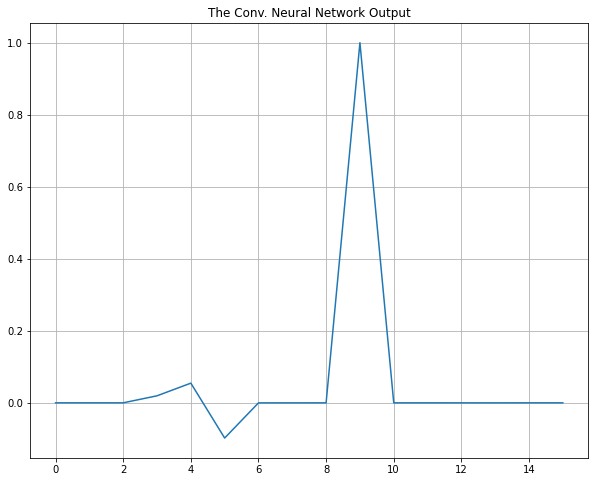

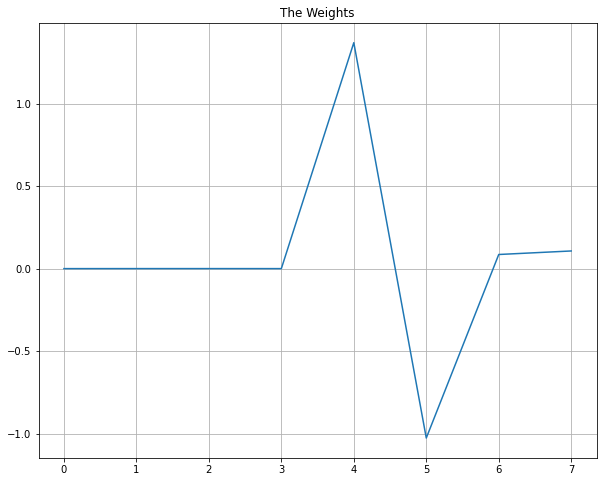

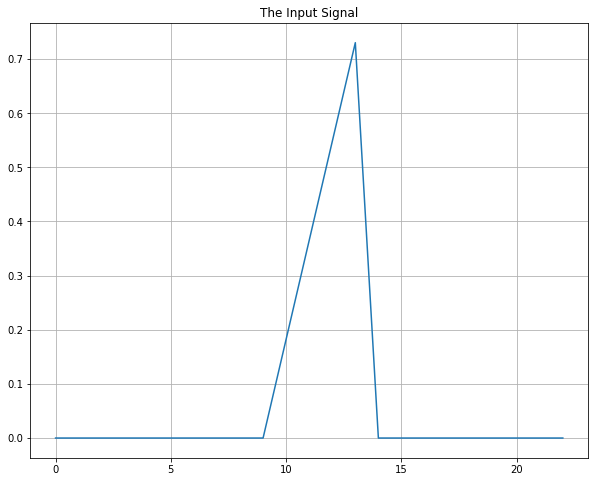

In [29]:
plt.figure(figsize=(10,8))
plt.plot(predictions[0,:,0])
plt.title('The Conv. Neural Network Output')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(weights)
plt.grid()
plt.title('The Weights')
plt.figure(figsize=(10,8))
plt.plot(X[0,:,0])
plt.title('The Input Signal')
plt.grid()

## Implementation using Python PyTorch

Pytorch is an alternative to Keras. Pytorch is used when more control of the neural network structure is desired. Our example for a convolutional neural network with causal padding:

In [59]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/_GzpaojzhBY?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

\# -*- coding: utf-8 -*-
\__author__ = 'Gerald Schuller'
\__copyright__ = 'G.S.'

"""
Simple program to use a convolutional neural network to obtain a matched filter, or an analysis filter bank, with filtering followed by downsampling, using pytorch.
Gerald Schuller, July 2018.
"""

In [30]:
# pytorch_simpl_convnet.py
import torch 
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [31]:
def generate_dummy_data():
    #Method to generate some artificial data in an numpy array form in order to fit the network.
    #:return: X, Y numpy arrays used for training, X: Input, Y: Target
    
    #Input signal X, a Ramp function:
    X= np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),np.zeros((1,9)))) #ramp as simple signal to detect
    #Make it unit L2 norm:
    X= X/np.sqrt(np.dot(X,X.transpose()))
    #Make input a shape that keras expects,
    #input X with shape (batch, channels, length), channels: e.g. RGB
    #https://pytorch.org/docs/stable/nn.html
    X = np.expand_dims(X, axis=0)  #add batch dimension (here only 1 batch)
    
    #Target function Y, the desired output:
    Y = np.zeros((1,30))
    Y[0,16]=1 #Detecting the signal at its end (for convolution padding='causal').
    #Make target a shape pytorch expects, same as input X shape:
    Y=np.expand_dims(Y, axis=0)
    return X, Y

In [32]:
#   Demonstration on using the code.
X, Y = generate_dummy_data() # Acquire Training Dataset
#print("Input X[0,:,0]=", X[0,:,0], "X.shape=", X.shape )
#print("Target Y[0,:,0]=", Y[0,:,0], "Y.shape=", Y.shape)
X=torch.from_numpy(X)
Y=torch.from_numpy(Y)
X=X.type(torch.Tensor)
Y=Y.type(torch.Tensor)
#X = torch.randn(1, 1, 23)
#Y = torch.randn(1, 1, 30)
#print("Input X[0,:,0]=", X[0,:,0], "X.shape=", X.shape )
#print("Target Y[0,:,0]=", Y[0,:,0], "Y.shape=", Y.shape)

In [33]:
print("Generate Model:")
#model = generate_model()     # Compile an neural net
#input size (N,Cin,L), N is a batch size, C denotes a number of channels, L is a length of signal sequence.
#padding=kernel_size-1 corresponds to "causal" in Keras:
model= nn.Sequential(nn.Conv1d(in_channels=1, out_channels=1, kernel_size=8, 
                               stride=1, padding=7,groups=1, bias=False),)
#model= nn.Conv1d(1,1,kernel_size=8)
print("Def. loss function:")
loss_fn = nn.MSELoss()
#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)

Generate Model:
Def. loss function:


In [34]:
for epoch in range(5000):
    Ypred=model(X)
    loss=loss_fn(Ypred, Y)
    if epoch%100==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.05866348743438721
100 0.04296145588159561
200 0.03483019769191742
300 0.029294447973370552
400 0.02489369548857212
500 0.021172529086470604
600 0.01799827627837658
700 0.015300889499485493
800 0.013017171062529087
900 0.011087893508374691
1000 0.009459640830755234
1100 0.008085238747298717
1200 0.00692351907491684
1300 0.005938938353210688
1400 0.00510131660848856
1500 0.004385499283671379
1600 0.003770963754504919
1700 0.0032413003500550985
1800 0.00278360559605062
1900 0.0023877944331616163
2000 0.002045940374955535
2100 0.0017516905209049582
2200 0.0014997744001448154
2300 0.0012856400571763515
2400 0.0011051956098526716
2500 0.0009546572109684348
2600 0.0008304647635668516
2700 0.0007292499649338424
2800 0.0006478376453742385
2900 0.0005832677707076073
3000 0.0005328136612661183
3100 0.000494006962981075
3200 0.00046465612831525505
3300 0.00044284487375989556
3400 0.0004269353812560439
3500 0.000415556482039392
3600 0.00040758520481176674
3700 0.0004021206696052104
3800 0.00039

In [35]:
Ypred=model(X)
Ypred=Ypred.data.numpy()
print("Predictions= ", Ypred[0,0,:])
weights=list(model.parameters())
print("Pytorch weights=", weights[0].data.numpy())
#Save in Pytorch format:
torch.save(model.state_dict(), 'model.ckpt')
#save weights to Pickle file:
with open("pytorchconvnetweights.pickle", 'wb') as weightfile:
    pickle.dump(weights, weightfile)

Predictions=  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  2.3575153e-02  6.3947313e-02
 -7.9957046e-02  2.2099856e-02  7.4167647e-03  3.3787622e-03
  9.8806238e-01  5.4605925e-03  1.0249496e-03 -5.1446585e-04
 -1.4920970e-03  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
Pytorch weights= [[[-2.0431380e-03  8.2789216e-04  1.8041199e-03  6.2209726e-03
    1.3471854e+00 -1.0093241e+00  9.2000991e-02  1.2912643e-01]]]


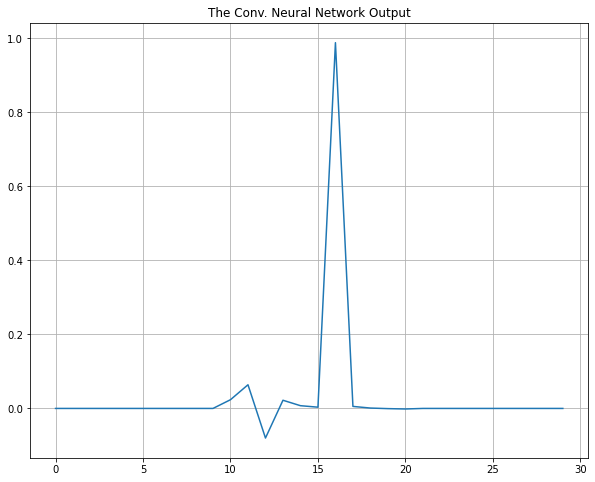

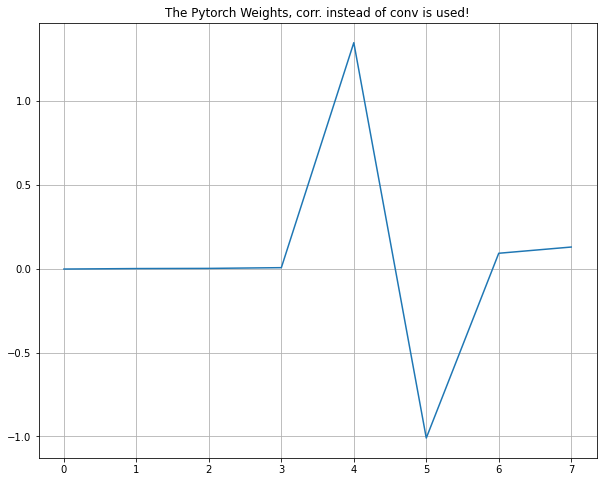

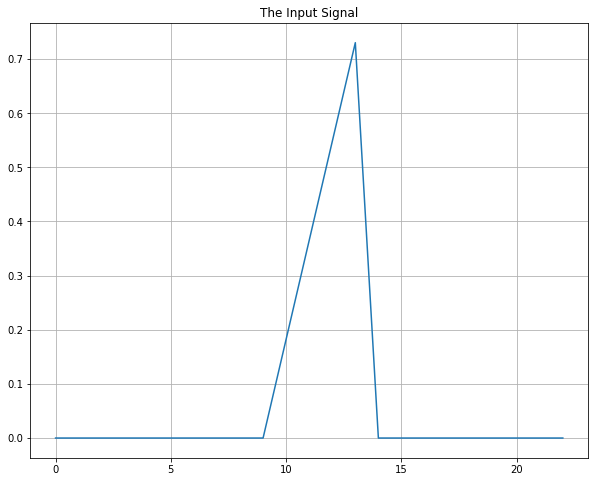

In [36]:
plt.figure(figsize=(10,8))
plt.plot(Ypred[0,0,:])
plt.title('The Conv. Neural Network Output')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(weights[0].data.numpy()[0,0,:])
plt.title('The Pytorch Weights, corr. instead of conv is used!')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(X[0,0,:].numpy())
plt.title('The Input Signal')
plt.grid()

Pytorch uses correlation instead of convolution for its filtering process, see:

In [37]:
%%html
<iframe src="https://pytorch.org/docs/stable/nn.html" width="900" height="400">
</iframe>

## Implementation using a Dense Net

In [60]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/zj7ueZvotqs?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In audio processing, the Conv1D layer is useful when the entire audio signal is in memory. Then the convolution can be seen as shifting the time reversed impulse response (the weights) along the audio signal to produce the output of the convolution.

But when we would like to do real time audio processing, the audio signal arrives block by block from the sound card, and we should process them as they arrive. This can be seen as shifting the audio signal along the time reversed impulse response (the weights).

We can implement this using a "dense" neural network layer, using a keras "Dense" layer. This layer has different defintions for the weights and the input, hence we need to translate them for this layer. The "Dense" layer basically implements a matrix multiplication, where the input signal is a row vector from the left and the matrix from the right contains the weights (in our case this matrix is a column vector).

First the weights. They don’t have the "channel" dimension, hence we need to remove it:

`weights[0]=weights[0][:,:,0]`

then we need to apply the time reversal from the convolution to it:

`weights[0]=np.flip(weights[0], axis=0)`

The we can set up a dense neural network model:

`filtlen=len(weights[0])
model = Sequential()
model.add(Dense(units=1, activation='linear',
use_bias=False, input_shape=(filtlen,)) )
model.set_weights(weights)`

Finally we need to transpose the input to be a row vector:

`X=np.transpose(X,axes=(0,2,1))`

Then we can loop over the signal. Here it still comes from the signal in memory, but it could also come from the sound card:

```python
for n in range(siglen-filtlen):
    #cut out the current signal block:
    Xblock=X[0,:,n:n+filtlen]
    prediction[n]=model.predict(Xblock)```

\# -*- coding: utf-8 -*-
__author__ = 'Gerald Schuller'
__copyright__ = 'G.S.'

"""
Simple program to implement a convolutional neural network using a dense network, for real time audio implementations.
Gerald Schuller, July 2017.
"""

In [38]:
# keras_simpl_densenet.py
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv1D
from keras.constraints import unit_norm
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [39]:
#Open weights file:
with open("convnetweights.pickle", 'rb') as weightfile:
    weights=pickle.load(weightfile)
print("weights[0].shape=", weights[0].shape)

weights[0].shape= (8, 1, 1)


In [40]:
#Converting weights from Convolutional layer to Dense layer:
weights[0]=weights[0][:,:,0] #remove channel dimension for the weights
print("weights[0].shape=", weights[0].shape)
#Flipping the impulse response (filter) dimension from the convolutional layer
#(Convolution is correlation with flipped filter weights):
#weights[0]=np.flip(weights[0], axis=0)
filtlen=len(weights[0])
print("filtlen=", filtlen)

weights[0].shape= (8, 1)
filtlen= 8


In [41]:
#Setup dense neural network model:   
model = Sequential()
model.add(Dense(units=1, activation='linear', use_bias=False, input_shape=(filtlen,)) )
model.set_weights(weights)

In [42]:
def generate_dummy_data():
    #Method to generate some artificial data in an numpy array form in order to fit the network.
    #:return: X, Y numpy arrays used for training, X: Input, Y: Target
    
    #Input signal X, a Ramp function:
    X= np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),np.zeros((1,9)))) #ramp as simple signal to detect
    #Make it unit L2 norm:
    X= X/np.sqrt(np.dot(X,X.transpose()))
    #Make input a shape that keras expects,
    #input X with shape (batch, length, channels), channels: e.g. RGB
    #https://stackoverflow.com/questions/43235531/convolutional-neural-network-conv1d-input-shape
    X=X.transpose()  #signal in the middle dimension
    X = np.expand_dims(X, axis=0)  #add batch dimension (here only 1 batch)
    
    #Target function Y, the desired output:
    Y = np.zeros((1,23))
    Y[0,16]=1 #Detecting the signal at its end (for convolution padding='causal').
    #Make target a shape keras expects, same as input X shape:
    Y=Y.transpose()
    Y=np.expand_dims(Y, axis=0)
    return X, Y

In [43]:
X, Y = generate_dummy_data() # Acquire signal
siglen=len(X[0,:,0])
prediction=np.zeros(siglen-filtlen+1)
#Transpose the signal for the dense layer, to obtain a row vector to be multiplied from the left 
#to the weight vector in Dense:
X=np.transpose(X,axes=(0,2,1))

In [44]:
#Loop over the entire signal in single steps until the end, in each step try to decode:
for n in range(siglen-filtlen):
    #cut out the current signal block:
    Xblock=X[0,:,n:n+filtlen]
    #print("Xblock.shape=", Xblock.shape)
       
    #Estimate the likelyhood of each character for the current block:
    prediction[n]=model.predict(Xblock)

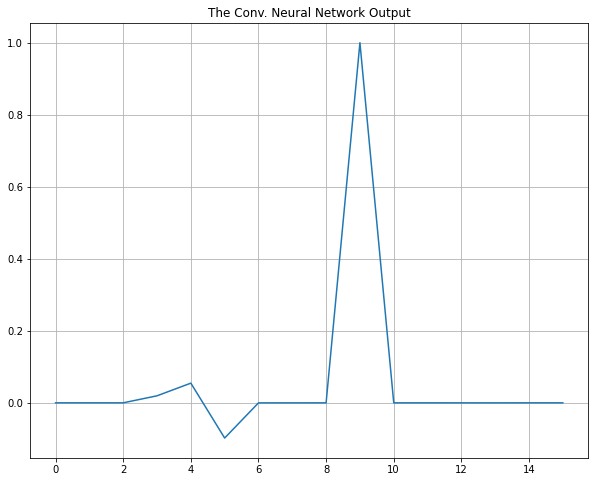

In [45]:
plt.figure(figsize=(10,8))
plt.plot(prediction)
plt.title('The Conv. Neural Network Output')
plt.grid()

## Real-Time Online-Implementation of Convolutional Neural Networks

In [61]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/3j2wA2YFn4I?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

For a keras convolutional network it is assumed that the entire data is already in memory, but in real-time, online processing, for instance for real-time audio or wireless processing, it needs to be processed as the data arrives, sample- or blockwise.

Instead of the Convent "sliding" the filter along the samples, here we slide the samples along the filter, implemented using a Dense net.

For that we need to convert the weights data format! For our **Conv1D** layer, the **weights** have the following **format**. It is an array of an array:

[0: filter weights, 1: bias for first layer]<br>
[filterlength, channels (subbands) in previous layer, neurons/filters in this layer]

The **weight format** for our desired “Dense” layer is the following:

[0: weights, 1: bias for first layer]<br>
[total weights=filterweights * channels (subbands or neurons) in previous layer (timereversed), neurons/filters in this layer]

We also need to observe that the convolution is a correlation with the flipped coefficients. In Our implementation we chose to keep the order of the weights, but flip the input signal instead.

Hence the weigh conversion from Conv1D to Dense is mainly a dimensionality reduction:

`weights[0]=weights[0][:,0,:]`

The signal is input into a shifting buffer, such that it appears fliped in time, meaning the latest sample appears at index 0:

```python
#"slide" buffer contest one sample "up": 
signalblock[:,1:]=signalblock[:,0:-1]
#assign current value to "buttom".
#This flips the signal, since the newest value appears at the 
lowest index:
signalblock[0,0]= X[0,sampind]
```





Our example program reads in the weights from the training of "Keras Simple Convnet”, from the file “convnetweights.pickle”.

\# -*- coding: utf-8 -*-
__author__ = 'Gerald Schuller'
__copyright__ = 'G.S.'

"""
Simple program to implement a convolutional neural network, or an analysis filter bank, using a keras dense net, for real time audio or wireless processing. For a keras convolutional network it is assumed that the entire data is already in memory, but in real time processing it needs to be processed as it arrives, sample- or block-wise.
Instead of Convent "sliding" the filter along the samples, here we slide the samples along the filter, implemented using a Dense net.
Gerald Schuller, May 2018.
"""

In [46]:
# keras_simpl_convdensenet.py
from keras.models import Sequential
from keras.layers.core import Dense, Activation

import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

filtlen=8

In [47]:
def generate_model():
    #    Method to construct a convolutional neural network using keras and theano.
    #    :return: Trainable object
    
    # Define the model. 
    model = Sequential()
    #Obtain a linear filter from a convolutional layer, similar to a matched filter:
    model.add(Dense(units=1, activation='linear', use_bias=False, input_shape=(filtlen,)))
    
    return model

In [48]:
def generate_data():
    #Method to generate some artificial data in an numpy array form in order to fit the Dense network.
    #:return: data X: I
    
    #Input signal X, a Ramp function:
    X= np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),np.zeros((1,9)))) #ramp as simple signal to detect
    #Make it unit L2 norm:
    X= X/np.sqrt(np.dot(X,X.transpose()))
    #Make input a shape that keras expects,
    #For Dense net: input X with shape (batch, length), 
    
    return X

In [49]:
#   Demonstration on using the code.
    
#Open weights file:
with open("convnetweights.pickle", 'rb') as weightfile:
    weights=pickle.load(weightfile)
print("weights[0].shape=", weights[0].shape)

weights[0].shape= (8, 1, 1)


In [50]:
#Convert Conv1D to Dense weights:################################
#weight format for Conv1d:
#[0: filter weights, 1: bias for first layer]
#[filterlength, channels (subbands) in previous layer, neurons/filters in this layer]  
#weight format for Dense:
#[0: weights, 1: bias for first layer]
#[total weights=filterweights * channels (subbands or neurons) in previous layer (time-reversed), neurons/filters in this layer] 
#remove "channels" dimension, since we only have 1 channel here:
weights[0]=weights[0][:,0,:]
print("weights[0].shape=", weights[0].shape)
#flip filter or weights dimension, because convolution is correlation with flipped weights:
weights[0]=np.flip(weights[0], axis=0)
#Signal is flipped, so the weights don't need to be flipped.
model = generate_model() 
#assign the converted weights:
model.set_weights(weights)

weights[0].shape= (8, 1)


In [51]:
#Aquire Input signal X, the Ramp function:
X = generate_data() 
print("X.shape=", X.shape)
#initialize "sliding" block buffer for the signal, as input for the Dense net:
signalblock=np.zeros((1,filtlen))

X.shape= (1, 23)


In [52]:
predictionsbuffer=np.zeros(X.shape[1])

#Simulate the samples coming samplewise from e.g. a sound card:
print("X.shape[1]=",X.shape[1])
for sampind in range(X.shape[1]):
    #"slide" buffer contest one sample "up":
    signalblock[:,1:]=signalblock[:,0:-1]
    #assign current value to "buttom". 
    #This flips the signal, since the newest value appears at the lowest index:
    signalblock[0,0]= X[0,sampind]
    #obtain model output for the block input:
    prediction=model.predict(signalblock)
    print("prediction.shape=", prediction.shape)
    #Outputs are collected in the buffer:
    predictionsbuffer[sampind]=prediction

X.shape[1]= 23
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)
prediction.shape= (1, 1)


predictionsbuffer.shape= (23,)


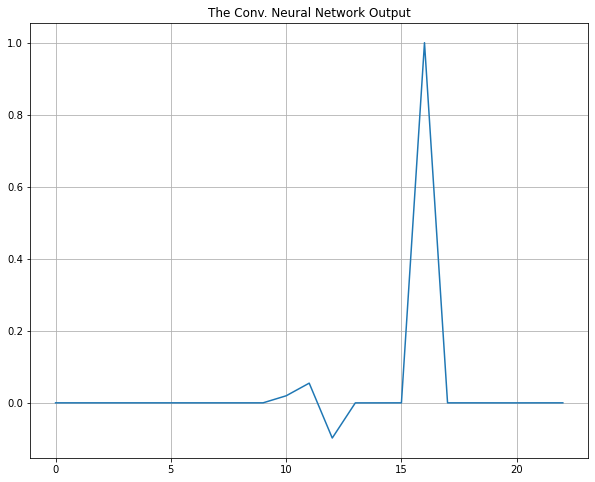

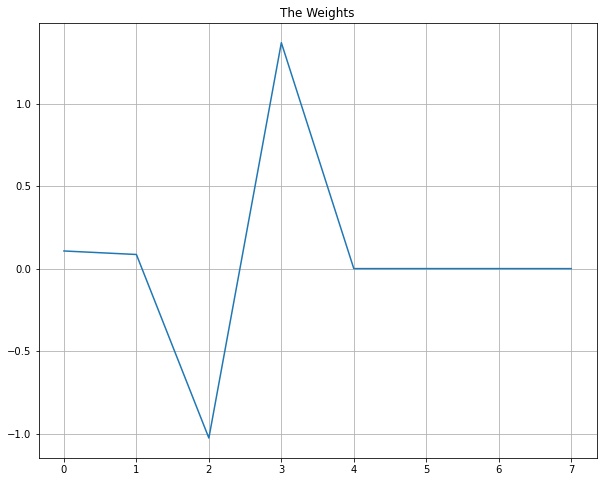

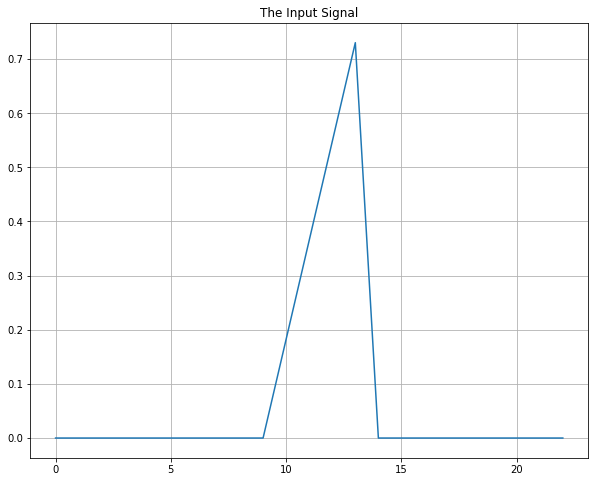

In [53]:
print("predictionsbuffer.shape=", predictionsbuffer.shape)
plt.figure(figsize=(10,8))
plt.plot(predictionsbuffer)
plt.title('The Conv. Neural Network Output')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(weights[0])
plt.grid()
plt.title('The Weights')
plt.figure(figsize=(10,8))
plt.plot(X[0,:])
plt.title('The Input Signal')
plt.grid()

**Observe:** We get the identical output as from our Convnet, but now we get 1 output sample for each new input sample.